## Final Project - Natural Disasters in Bangladesh
#### Alice Tianbo Zhang (tz2218@columbia.edu)
#### December 7, 2017

##### Description
In this project, I investigate Bangladesh's exposure to natural disasters using historical geo-referenced data on disaster frequency and intensity. I focus specifically on earthquakes and hurricanes because of their readily available location information. 

##### Objective
This research will be part of a dissertation chapter, in which I study the effect of natural disater exposure on household decision making. The goal is to inform understanding on the welfare impact of natural disasters and the extent to which vulnerable populations bear more of the burden of such adverse shocks.


##### Table of Contents
- Part I - Earthquake and Topography Maps in GMT
    >* Extract DEM and earthquake data from GeoMapApp and create maps in GMT.
- Part II - Earthquake Hazard Maps
    >* Compare and complement earthquake data extracted from GeoMapApp with data on earthquake hazard from GSHAP.
- Part III - Historical Earthquake Occurrence 1900-2017
    >* Analyze the spatial and temporal variation of historical earthquake occurrence in Bangladesh.
- Part IV - Correlation between Earthquake PGA and Magnitude
    >* Investigate the question "to what extent do PGA values predict the actual magnitude of earthquakes"?
- Part V - Historical Hurricane Tracks 1848 - 2017
    >* Use `Basemap` to visualize storm track location and wind speed data for Bangladesh.


##### Data Sources

- Earthquake Hazard: 
   - The Global Seismic Hazard Map (GSHAP) data downloaded at: 
   - http://gmo.gfz-potsdam.de/pub/gshap_data/gshap_data_frame.html
   
        
- Earthquake Location and Magnitude: 
   - USGS ANSS Composite Catalog (hosted by the Northern California Data Center) data downloaded at: 
   - http://www.quake.geo.berkeley.edu/anss/catalog-search.html


- Storm Track Location and Intensity:
   - NOAA International Best Track Archive for Climate Stewardship (IBTrACS) data downloaded at: 
   - https://www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data


## Part I - Earthquake and Topography Maps in GMT

#### In this part,  I extract DEM and earthquake data from GeoMapApp with the following steps:
- In GeoMapApp, I zoom the map to cover mostly Bangladesh --> click on the "Load/Unload GMRT grid" to load the GMRT grid data --> save the grid file as a netCDF-3.nc file called "bd.nc"
- I load the built-in data layer for earthquakes: DataLayers/Geophysics/Earthquakes/Earthquake Locations/Global/Magnitude > 4.5 (1960-2017) --> save table as a .txt file called "GeoMapApp_Earthquake4.5_1960-2017.txt"
- I create two subset files, containing the magnitude and depth of the earthquakes in addition to longitude and latitude location for plotting in GMT. 
- I write a GMT bash script to plot the shaded topography data and show the earthquake locations as small circles color coded by magnitude and depth respectively. 

### GMT bash script

~~~~
#!/bin/sh

# Document settings
gmtset PS_PAGE_ORIENTATION portrait
gmtset MAP_FRAME_PEN 3
gmtset MAP_FRAME_WIDTH 0.1
gmtset MAP_FRAME_TYPE plain
gmtset PS_MEDIA=Custom_15ix12i
gmtset FONT_TITLE Helvetica-Bold
gmtset FONT_LABEL Helvetica-Bold 14p

# Use GMT to make a topography map showing the earthquake locations (color code by magnitude)
gmt grdinfo Data/bd.nc
gmt grdgradient Data/bd.nc -Ne0.8 -A100 -fg -GData/bd_i.nc
gmt makecpt -Crelief -T-1000/1000/10 -Z > Data/dem.cpt
gmt grdimage Data/bd.nc -IData/bd_i.nc -JM12i -Ba -CData/dem.cpt -K > Figure/BDEarthquake_mag.ps
gmt psscale -DjTC+w10i/0.25i+h+o0/-1i -Ba -RData/bd.nc -JM12i -CData/dem.cpt -I0.4 -By+lMeters -K -O >> Figure/BDEarthquake_mag.ps
gmt pscoast -RData/bd.nc -JM12i -N1/1p -K -O >> Figure/BDEarthquake_mag.ps
gmt pscoast -RData/bd.nc -JM12i -N2/0.5p -K -O >> Figure/BDEarthquake_mag.ps
gmt pscoast -RData/bd.nc -JM12i -Df -N2/3/0/0/0 -K -O -Lf86.5/21/22.5/250 -V >> Figure/BDEarthquake_mag.ps
gmt makecpt -Cseis -T4.5/7.5/0.5 -Iz > Data/earthquake_mag.cpt
gmt psxy Data/earthquake_mag.csv -RData/bd.nc -JM12i -Sc0.07i -W0.2p -CData/earthquake_mag.cpt -K -O >> Figure/BDEarthquake_mag.ps
gmt psscale -D12.5i/4i/12c/1.25c -RData/bd.nc -JM8i -CData/earthquake_mag.cpt -I0.4 -By+lRichter -O >> Figure/BDEarthquake_mag.ps

# Use GMT to make a topography map showing the earthquake locations (color code by depth)
gmt grdinfo Data/bd.nc
gmt grdgradient Data/bd.nc -Ne0.8 -A100 -fg -GData/bd_i.nc
gmt makecpt -Crelief -T-1000/1000/10 -Z > Data/dem.cpt
gmt grdimage Data/bd.nc -IData/bd_i.nc -JM12i -Ba -CData/dem.cpt -K > Figure/BDEarthquake_depth.ps
gmt psscale -DjTC+w10i/0.25i+h+o0/-1i -Ba -RData/bd.nc -JM12i -CData/dem.cpt -I0.4 -By+lMeters -K -O >> Figure/BDEarthquake_depth.ps
gmt pscoast -RData/bd.nc -JM12i -N1/1p -K -O >> Figure/BDEarthquake_depth.ps
gmt pscoast -RData/bd.nc -JM12i -N2/0.5p -K -O >> Figure/BDEarthquake_depth.ps
gmt pscoast -RData/bd.nc -JM12i -Df -N2/3/0/0/0 -K -O -Lf86.5/21/22.5/250 -V >> Figure/BDEarthquake_depth.ps
gmt makecpt -Chaxby -T5/100/10 -Iz > Data/earthquake_depth.cpt
gmt psxy Data/earthquake_depth.csv -RData/bd.nc -JM12i -Sc0.07i -W0.2p -CData/earthquake_depth.cpt -K -O >> Figure/BDEarthquake_depth.ps
gmt psscale -D12.5i/4i/12c/1.25c -RData/bd.nc -JM8i -CData/earthquake_depth.cpt -I0.4 -By+lm -O >> Figure/BDEarthquake_depth.ps
~~~~


### Topography Map with Earthquakes in Bangladesh 1960-2017 (by Magnitude)
![alt text](../Figure/BDEarthquake_mag.png)

### Topography Map with Earthquakes in Bangladesh 1960-2017 (by Depth)
![alt text](../Figure/BDEarthquake_depth.png)

## Part II - Earthquake Hazard Maps

#### In this part, I compare and complement earthquake data extracted from GeoMapApp with data on earthquake hazard from GSHAP. 

From the website of GSHAP: 
> The Global Seismic Hazard Map depicts the seismic hazard as Peak Ground Acceleration(PGA) with 10% probability of exceedence in 50 years, corresponding to a return period of 475 years. 

> The compilation of the GSHAP Global Seismic Hazard Map was based on the integration of all results from GSHAP regions and test areas in three greater GSHAP areas.

    >* the Americas (Shedlock & Tanner, 1999)
    >* Asia, Australia and Oceania (Zhang et al., 1999; McCue, 1999)
    >* Europe, Africa and the Middle East (Grünthal et al., 1999)


Data Source: 
   - The Global Seismic Hazard Map (GSHAP) data downloaded at: 
   - http://gmo.gfz-potsdam.de/pub/gshap_data/gshap_data_frame.html
   



### Load Packages

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
%matplotlib inline
import decimal
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.basemap import Basemap

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Read in GSHAP Earthquake Hazard Data 

In [2]:
gshap = pd.read_csv("../Data/GSHPUB.DAT", sep='\s+', header = None)
gshap.columns = ['Longitude', 'Latitude', 'PGA']

In [3]:
## Check data types 
gshap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369091 entries, 0 to 5369090
Data columns (total 3 columns):
Longitude    float64
Latitude     float64
PGA          float64
dtypes: float64(3)
memory usage: 122.9 MB


In [4]:
## Summary statistics
gshap.describe()

,Longitude,Latitude,PGA
count,5.369091e+06,5.369091e+06,3.630028e+06
mean,1.300000e+01,1.250000e+01,7.413639e-01
std,1.039519e+02,4.304146e+01,1.092983e+00
min,-1.670000e+02,-6.200000e+01,0.000000e+00
25%,-7.700000e+01,-2.480000e+01,3.050000e-02
50%,1.300000e+01,1.250000e+01,2.745755e-01
75%,1.030000e+02,4.980000e+01,1.006100e+00
max,1.930000e+02,8.700000e+01,9.780000e+00


In [5]:
gshap.head()

,Longitude,Latitude,PGA
0,-167.0,87.0,NaN
1,-166.9,87.0,NaN
2,-166.8,87.0,NaN
3,-166.7,87.0,NaN
4,-166.6,87.0,NaN


### Mask out NaN values

In [6]:
gshap_mask = gshap[~np.isnan(gshap.PGA)]
gshap_mask.head()

,Longitude,Latitude,PGA
2300,63.0,87.0,2.94721
2301,63.1,87.0,2.94848
2302,63.2,87.0,2.94974
2303,63.3,87.0,2.95101
2304,63.4,87.0,2.95227


### Visualize Earthquake Hazard Map  - Global

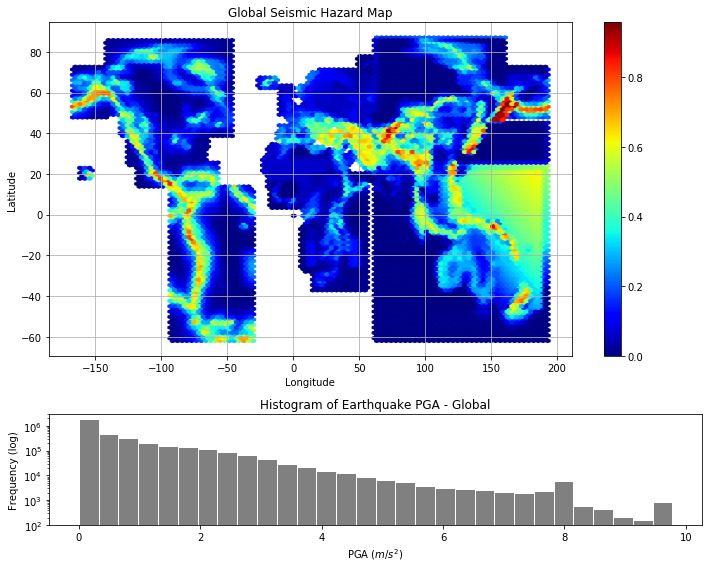

In [7]:
fig = plt.subplots(figsize =(10,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 

# Hazard Map - Global (log transform PGA for color scale)
ax1 = plt.subplot(gs[0])
gshap_mask.plot.hexbin('Longitude', 'Latitude', C = 'PGA', bins = 'log', cmap = plt.cm.jet, ax = ax1)
ax1.grid()
ax1.set_title('Global Seismic Hazard Map')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Earthquake PGA Histogram - Global
ax2 = plt.subplot(gs[1])
ax2.hist(gshap_mask.PGA, bins=30, edgecolor='white', linewidth=1, facecolor='gray')
ax2.set_title('Histogram of Earthquake PGA - Global')
ax2.set_yscale('log', nonposy='clip')
ax2.set_xlabel('PGA ($m/s^2$)')
ax2.set_ylabel('Frequency (log)')
plt.tight_layout()
plt.savefig('../Figure/gshap_map_world.pdf')

### Create Function to Subset Data for Bangladesh

In [8]:
def subset_bd(data):
    bd = data[(data.Longitude >= 87) & (data.Longitude <= 94)
              & (data.Latitude >= 20) & (data.Latitude <= 27)]
    return bd

In [9]:
gshap_mask_bd = subset_bd(gshap_mask)
gshap_mask_bd.head()

,Longitude,Latitude,PGA
2163140,87.0,27.0,3.55217
2163141,87.1,27.0,3.51814
2163142,87.2,27.0,3.46475
2163143,87.3,27.0,3.38418
2163144,87.4,27.0,3.27975


### Visualize Earthquake Hazard Map -  Bangladesh

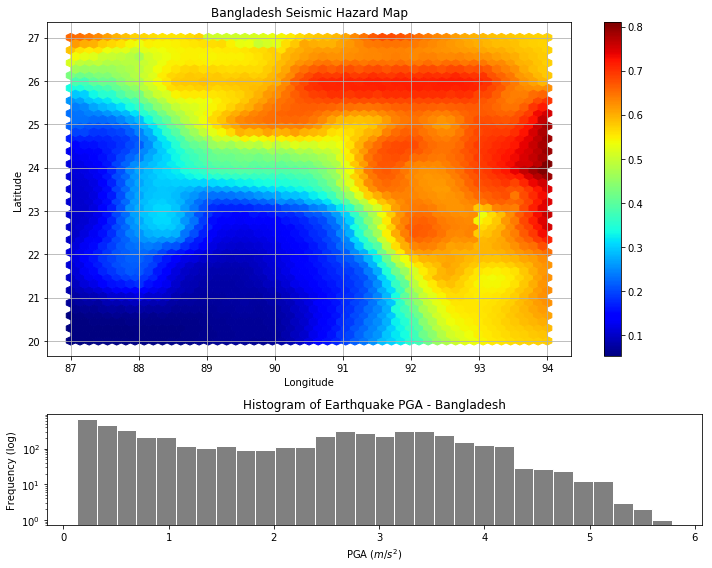

In [10]:
fig = plt.subplots(figsize =(10,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 

# Hazard Map - Bangladesh (log transform PGA for color scale)
ax1 = plt.subplot(gs[0])
gshap_mask_bd.plot.hexbin('Longitude', 'Latitude', C = 'PGA', bins = 'log', cmap = plt.cm.jet, ax = ax1, 
                       gridsize = (52,24), edgecolors = 'face')
ax1.grid()
ax1.set_title('Bangladesh Seismic Hazard Map')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Earthquake PGA Histogram - Bangladesh
ax2 = plt.subplot(gs[1])
ax2.hist(gshap_mask_bd.PGA, bins=30, edgecolor='white', linewidth=1, facecolor='gray')
ax2.set_yscale('log', nonposy='clip')
ax2.set_title('Histogram of Earthquake PGA - Bangladesh')
ax2.set_xlabel('PGA ($m/s^2$)')
ax2.set_ylabel('Frequency (log)')
plt.tight_layout()
plt.savefig('../Figure/gshap_map_bd.pdf')

## Part III - Historical Earthquake Occurrence 1900-2017

#### In this part, I analyze USGS data on historical earthquake occurrence. 

I first extract earthquake location and magnitude from the USGS ANSS Composite Catalog, hosted by the Norther California Data Center. Then, I analyze the spatial and temporal variation of earthquake occurrence in Bangladesh.

The search parameters I used to select the data are:
>* catalog = ANSS
>* start_time = 1900/01/01,00:00:00
>* end_time = 2017/11/07,00:00:00
>* minimum_magnitude=2.5
>* maximum_magnitude=10
>* event_type=E


Data Source: 
   - USGS ANSS Composite Catalog (hosted by the Northern California Data Center) data downloaded at: 
   - http://www.quake.geo.berkeley.edu/anss/catalog-search.html


### Read in USGS ANSS data
Ensure that the date column is identified as dates and earthquake ID is used as index.

In [11]:
anss = pd.read_csv("../Data/catsearch.10843.txt", parse_dates = ['DateTime'], index_col = ['EventID'], low_memory = False)

### Parse Date Column
File contains unparseable date, the column was unaltered in the default `pd.read_csv` command

In [12]:
anss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827198 entries, nan to 72919791
Data columns (total 11 columns):
DateTime      827198 non-null object
Latitude      827198 non-null float64
Longitude     827198 non-null float64
Depth         822177 non-null float64
Magnitude     827198 non-null float64
MagType       827198 non-null object
NbStations    742790 non-null float64
Gap           165621 non-null float64
Distance      158262 non-null float64
RMS           800745 non-null float64
Source        827198 non-null object
dtypes: float64(8), object(3)
memory usage: 75.7+ MB


In [13]:
## Extract date from 'DateTime' variable
date = []
for d in anss['DateTime']:
    date.append(d.split(" ")[0])
    
## Create new 'Date' variable 
anss['Date'] = date

## Fix typo for the date of one observation (1987 is not a leap year and there were only 28 days in Febuary)
anss.loc[anss['Date'] == '1987/02/29', ['Date']] = '1987/02/28'

In [14]:
## Convert date to datetime variable
anss['Date'] = pd.to_datetime(anss.Date, format = "%Y/%m/%d")

## Check that 'Date' is indeed a datetime variable
anss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827198 entries, nan to 72919791
Data columns (total 12 columns):
DateTime      827198 non-null object
Latitude      827198 non-null float64
Longitude     827198 non-null float64
Depth         822177 non-null float64
Magnitude     827198 non-null float64
MagType       827198 non-null object
NbStations    742790 non-null float64
Gap           165621 non-null float64
Distance      158262 non-null float64
RMS           800745 non-null float64
Source        827198 non-null object
Date          827198 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 82.0+ MB


In [15]:
## Check dataframe
anss.tail()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,Date
EventID,,,,,,,,,,,,
72918861,2017/11/04 06:56:34.53,37.4795,-118.4845,6.37,2.85,Md,39.0,100.0,7.0,0.05,NC,2017-11-04
611504,2017/11/04 11:04:22.18,38.5682,-119.5732,10.90,2.80,ML,40.0,73.0,27.0,0.16,NN,2017-11-04
72919421,2017/11/05 09:02:03.92,37.0965,-122.3665,7.11,2.52,Md,52.0,178.0,11.0,0.15,NC,2017-11-05
38037848,2017/11/06 03:53:51.15,32.8928,-115.9900,10.29,2.55,ML,124.0,NaN,NaN,0.22,CI,2017-11-06
72919791,2017/11/06 07:22:34.68,35.7078,-121.0460,9.08,2.65,Md,77.0,53.0,10.0,0.05,NC,2017-11-06


In [16]:
## Summary statistics for all columns
anss.describe()

,Latitude,Longitude,Depth,Magnitude,NbStations,Gap,Distance,RMS
count,827198.000000,827198.000000,822177.000000,827198.000000,742790.000000,165621.000000,158262.000000,800745.000000
mean,20.329503,-17.014630,54.227459,3.859059,33.987547,137.204896,15.596997,0.553503
std,29.162358,119.204811,97.266589,0.900733,52.382032,86.914248,31.823626,0.563442
min,-84.422000,-180.000000,-9.350000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,-3.262000,-119.935800,10.000000,3.000000,10.000000,69.000000,2.000000,0.010000
50%,32.040000,-64.868650,26.200000,4.000000,18.000000,112.000000,4.000000,0.540000
75%,40.312300,120.029000,48.600000,4.600000,37.000000,190.000000,12.000000,0.970000
max,87.221000,180.000000,735.800000,9.100000,934.000000,360.000000,634.000000,104.000000


In [17]:
## Check the number of missing values for Magnitude and Depth
print('Number of observations with missing magnitude:', np.isnan(anss.Magnitude).sum())
print('Number of observations with missing depth:', np.isnan(anss.Depth).sum())

Number of observations with missing magnitude: 0
Number of observations with missing depth: 5021


### Visualize Earthquake Location (by Magnitude)

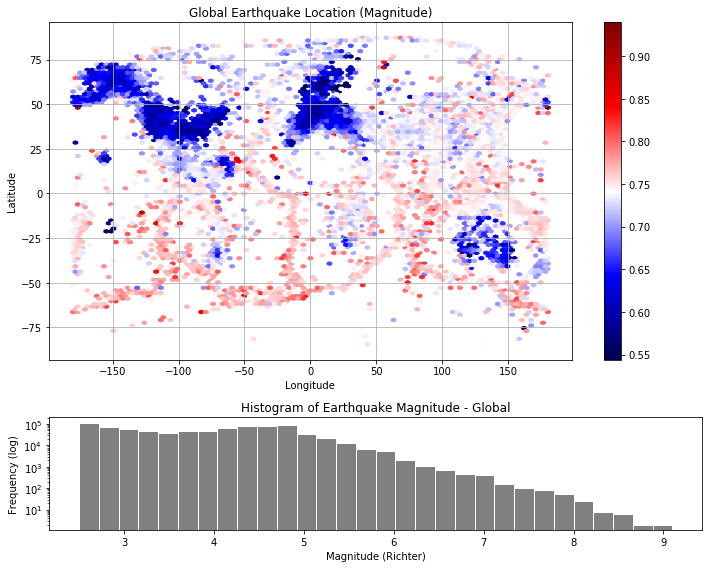

In [18]:
fig = plt.subplots(figsize =(10,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 

# Earthquake Location Map - Global
ax1 = plt.subplot(gs[0])
anss.plot.hexbin('Longitude', 'Latitude', C = 'Magnitude', bins = 'log', cmap = 'seismic', ax = ax1)
ax1.grid()
ax1.set_title('Global Earthquake Location (Magnitude)')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Earthquake Magnitude Histogram - Global
ax2 = plt.subplot(gs[1])
ax2.hist(anss['Magnitude'], bins=30, edgecolor='white', linewidth=1, facecolor='gray')
ax2.set_title('Histogram of Earthquake Magnitude - Global')
ax2.set_yscale('log', nonposy='clip')
ax2.set_xlabel('Magnitude (Richter)')
ax2.set_ylabel('Frequency (log)')
plt.tight_layout()
plt.savefig('../Figure/anss_mag_global.pdf')

### Visualize Earthquake Location (by Depth)

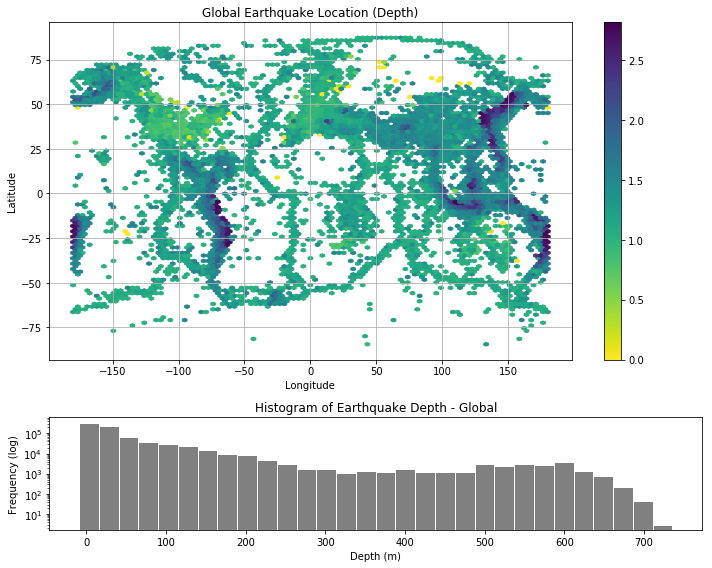

In [19]:
fig = plt.subplots(figsize =(10,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 

# Earthquake Location Map - Global
ax1 = plt.subplot(gs[0])
anss.plot.hexbin('Longitude', 'Latitude', C = 'Depth', bins = 'log', cmap = plt.cm.viridis_r, ax = ax1)
ax1.grid()
ax1.set_title('Global Earthquake Location (Depth)')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Earthquake Magnitude Histogram - Global
ax2 = plt.subplot(gs[1])
ax2.hist(anss.Depth[~np.isnan(anss.Depth)], bins=30, edgecolor='white', linewidth=1, facecolor='gray')
ax2.set_title('Histogram of Earthquake Depth - Global')
ax2.set_yscale('log', nonposy='clip')
ax2.set_xlabel('Depth (m)')
ax2.set_ylabel('Frequency (log)')
plt.tight_layout()
plt.savefig('../Figure/anss_depth_global.pdf')

### Subset ANSS data for Bangladesh

In [20]:
anss_bd = subset_bd(anss)

### Bangladesh - Spatial Variation in Earthquake Occurrence

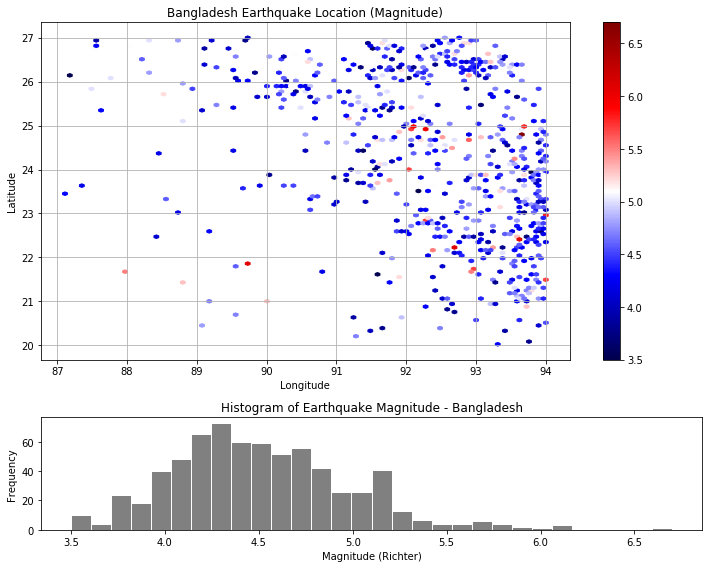

In [21]:
fig = plt.subplots(figsize =(10,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 

# Earthquake Location Map - Bangladesh
ax1 = plt.subplot(gs[0])
anss_bd.plot.hexbin('Longitude', 'Latitude', C = 'Magnitude', cmap = 'seismic', ax = ax1)
ax1.grid()
ax1.set_title('Bangladesh Earthquake Location (Magnitude)')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Earthquake Magnitude Histogram - Bangladesh
ax2 = plt.subplot(gs[1])
ax2.hist(anss_bd['Magnitude'], bins=30, edgecolor='white', linewidth=1, facecolor='gray')
ax2.set_title('Histogram of Earthquake Magnitude - Bangladesh')
ax2.set_xlabel('Magnitude (Richter)')
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('../Figure/anss_mag_bd.pdf')

### Bangladesh - Temporal Variation in Earthquake Occurrence

In [22]:
## Reformat ANSS data into time series
anss_bd_ts = anss_bd.set_index('Date')
anss_bd_ts.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source
Date,,,,,,,,,,,
1963-03-02,1963/03/02 02:45:37.10,23.8,92.2,36.0,4.2,Mb,7.0,NaN,NaN,0.0,NEI
1963-03-16,1963/03/16 03:35:21.50,26.0,92.8,39.0,4.5,Mb,18.0,NaN,NaN,0.0,NEI
1963-06-19,1963/06/19 10:47:24.60,25.0,92.1,51.0,5.9,Mb,73.0,NaN,NaN,0.0,NEI
1963-06-21,1963/06/21 15:26:29.30,24.9,92.1,53.0,5.7,Mb,61.0,NaN,NaN,0.0,NEI
1964-01-22,1964/01/22 15:58:46.50,22.4,93.6,88.0,6.1,Mb,41.0,NaN,NaN,0.0,NEI


In [23]:
### Find the top 10 years with the largest earthquakes
anss_bd_ts.groupby(anss_bd_ts.index.year).max().sort_values('Magnitude', ascending = False).head(10)

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source
Date,,,,,,,,,,,
2016,2016/11/15 02:10:21.12,26.7746,93.9691,63.47,6.7,Mw,NaN,178.0,4.0,1.46,us
1997,1997/11/22 02:34:43.79,26.8110,93.9590,100.00,6.1,Mw,362.0,NaN,NaN,1.40,NEI
1964,1964/08/17 14:42:56.60,24.2000,94.0000,184.00,6.1,Mb,41.0,NaN,NaN,0.00,NEI
1989,1989/12/08 02:47:52.69,26.9870,93.7900,104.50,6.1,Mb,412.0,NaN,NaN,1.28,NEI
1963,1963/06/21 15:26:29.30,26.0000,92.8000,53.00,5.9,Mb,73.0,NaN,NaN,0.00,NEI
1973,1973/12/26 01:42:21.60,26.9980,93.5480,54.00,5.9,Mb,88.0,NaN,NaN,0.00,NEI
1965,1965/07/05 23:41:46.90,26.7000,94.0000,70.00,5.8,Mb,65.0,NaN,NaN,0.00,NEI
2006,2006/12/05 04:36:29.95,26.9120,93.8510,61.00,5.8,Mw,263.0,NaN,NaN,1.34,NEI
1988,1988/12/05 06:17:38.56,26.2850,93.8900,89.20,5.8,Mb,309.0,NaN,NaN,1.36,NEI


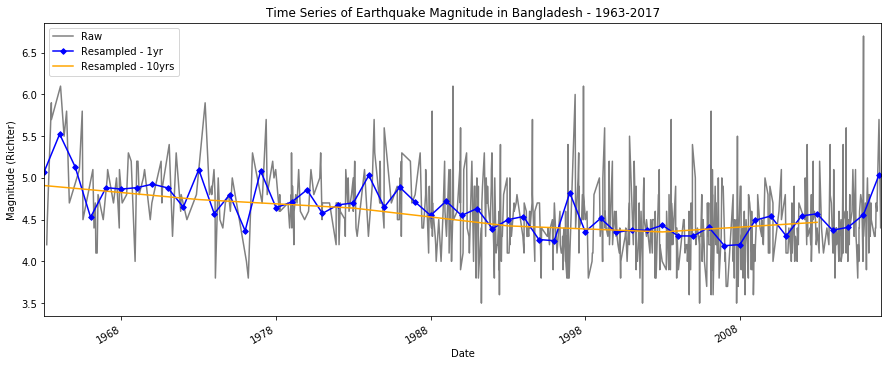

In [24]:
## Overlay raw time series with resampled 1-yr and 10-yr series 
fig, ax1 = plt.subplots(figsize =(15,6))
anss_bd_ts.Magnitude.plot(color ='gray', ax = ax1)
anss_bd_ts.Magnitude.resample('AS').mean().plot(marker = 'D', color ='blue', markersize = 4, ax = ax1)
anss_bd_ts.Magnitude.resample('10AS').mean().plot(color ='orange', markersize = 4, ax = ax1)
ax1.set_ylabel('Magnitude (Richter)')
ax1.set_title('Time Series of Earthquake Magnitude in Bangladesh - 1963-2017')
ax1.legend(['Raw','Resampled - 1yr', 'Resampled - 10yrs'])
fig.savefig('../Figure/anss_ts_bd.pdf')

## Part IV - Correlation between Earthquake PGA and Magnitude

#### In this section, I investigate the question "to what extent do PGA values predict the actual magnitude of earthquakes"?

Understanding the correlation between PGA and magnitude will shed light on the limitations of using PGA to predict actual earthquake intensity and whether PGA is a reasonably good _ex ante_ measure of earthquake hazard for a given population. 

### Many-to-one Merge GSHAP and ANSS datasets by Location

In [25]:
## Round latitude and longitude variables in ANSS for merging
gshap_anss = anss
gshap_anss['Longitude'] = round(gshap_anss.Longitude, 1)
gshap_anss['Latitude'] = round(gshap_anss.Latitude, 1)
gshap_anss.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,Date
EventID,,,,,,,,,,,,
NaN,1900/10/10 12:28:17.60,57.1,-153.5,0.0,8.3,ML,0.0,NaN,NaN,NaN,AK,1900-10-10
NaN,1901/01/18 04:39:00.00,60.0,-135.0,0.0,7.1,ML,0.0,NaN,NaN,NaN,AK,1901-01-18
NaN,1901/12/30 22:34:00.00,52.0,-160.0,0.0,6.6,ML,0.0,NaN,NaN,NaN,AK,1901-12-30
NaN,1901/12/31 09:02:43.10,51.4,-171.0,0.0,7.8,ML,0.0,NaN,NaN,NaN,AK,1901-12-31
NaN,1902/01/01 05:20:14.80,52.4,-167.4,0.0,7.8,ML,0.0,NaN,NaN,NaN,AK,1902-01-01


In [26]:
## Merge GSHAP and ANSS data by longitude and latitude
gshap_anss = pd.merge(gshap_anss, gshap, on=['Longitude', 'Latitude'], how='left')
gshap_anss.tail()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,Date,PGA
827193,2017/11/04 06:56:34.53,37.5,-118.5,6.37,2.85,Md,39.0,100.0,7.0,0.05,NC,2017-11-04,4.13124
827194,2017/11/04 11:04:22.18,38.6,-119.6,10.90,2.80,ML,40.0,73.0,27.0,0.16,NN,2017-11-04,3.52601
827195,2017/11/05 09:02:03.92,37.1,-122.4,7.11,2.52,Md,52.0,178.0,11.0,0.15,NC,2017-11-05,4.22057
827196,2017/11/06 03:53:51.15,32.9,-116.0,10.29,2.55,ML,124.0,NaN,NaN,0.22,CI,2017-11-06,4.38002
827197,2017/11/06 07:22:34.68,35.7,-121.0,9.08,2.65,Md,77.0,53.0,10.0,0.05,NC,2017-11-06,2.68443


In [27]:
## Subset and save merged data for Bangladesh
gshap_anss_bd = subset_bd(gshap_anss)
gshap_anss_bd.describe()

,Latitude,Longitude,Depth,Magnitude,NbStations,Gap,Distance,RMS,PGA
count,723.000000,723.000000,723.000000,723.000000,632.000000,98.000000,96.000000,723.000000,723.000000
mean,24.228769,92.398617,42.836113,4.507192,42.507911,105.581633,2.208333,0.793527,3.407807
std,1.845231,1.479059,22.194336,0.459680,58.880227,51.851478,1.288954,0.407337,0.909249
min,20.000000,87.000000,5.000000,3.500000,5.000000,10.000000,0.000000,0.000000,0.163105
25%,22.800000,91.700000,33.000000,4.200000,12.000000,66.000000,1.000000,0.630000,3.012575
50%,24.200000,92.800000,35.000000,4.500000,21.000000,102.000000,2.000000,0.840000,3.439120
75%,26.000000,93.600000,53.630000,4.800000,43.000000,144.000000,3.000000,1.070000,3.898885
max,27.000000,94.000000,184.000000,6.700000,422.000000,246.000000,9.000000,1.890000,5.785650


### Calculate Average Earthquake Exposure by Location

In [28]:
## Group by latitude and longitude
# Full dataset 
eq_avg = gshap_anss.groupby(['Latitude', 'Longitude'], as_index = False).agg({'Magnitude': 'mean',
                                                                              'Depth': 'mean',
                                                                              'PGA': 'first', 
                                                                              'Date': 'count'})
eq_avg = eq_avg.rename(columns = {'Date': 'Freq'})

# Bangladesh only 
eq_avg_bd = gshap_anss_bd.groupby(['Latitude', 'Longitude'], as_index = False).agg({'Magnitude': 'mean',
                                                                                    'Depth': 'mean',
                                                                                    'PGA': 'first', 
                                                                                    'Date': 'count'})
eq_avg_bd = eq_avg_bd.rename(columns = {'Date': 'Freq'})

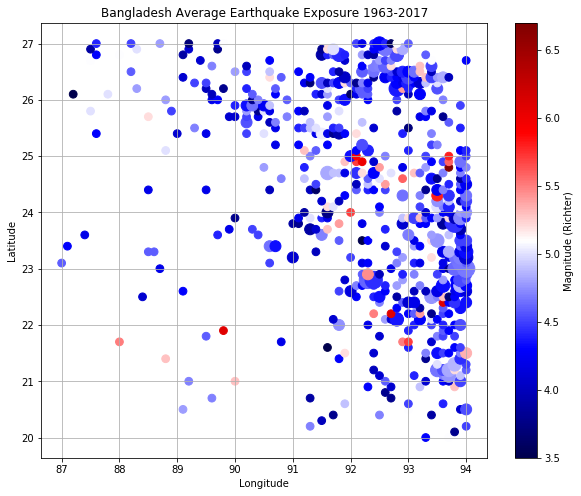

In [29]:
# Average Earthquake Magnitude - Bangladesh
fig, ax = plt.subplots(figsize =(10,8))
x = ax.scatter(eq_avg_bd.Longitude, eq_avg_bd.Latitude, s = eq_avg_bd.Freq*60, 
           marker = 'o', c = eq_avg_bd.Magnitude, cmap = 'seismic')
ax.grid()
ax.set_title('Bangladesh Average Earthquake Exposure 1963-2017')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
cb = fig.colorbar(x)
cb.set_label('Magnitude (Richter)')
plt.savefig('../Figure/anss_avgMag_bd.pdf')

### OLS Regression of PGA on Magnitude and Depth

In [30]:
## Run linear regression and store results
# Global
eq_avg_mask = eq_avg[(~np.isnan(eq_avg.Magnitude)) & (~np.isnan(eq_avg.Depth)) & (~np.isnan(eq_avg.PGA))]
X_global = eq_avg_mask[['Magnitude', 'Depth']]
model_global = sm.OLS(eq_avg_mask.PGA, X_global)
result_global = model_global.fit(cov_type='cluster', cov_kwds={'groups': np.array(eq_avg_mask[['Longitude', 'Latitude']])})
print('OLS Regression - Global')
print(result_global.summary())

# Bangladesh
X_bd = eq_avg_bd[['Magnitude', 'Depth']]
model_bd = sm.OLS(eq_avg_bd.PGA, X_bd)
result_bd = model_bd.fit(cov_type='cluster', cov_kwds={'groups': np.array(eq_avg_bd[['Longitude', 'Latitude']])})
print('OLS Regression - Bangladesh')
print(result_bd.summary())

OLS Regression - Global
                            OLS Regression Results                            
Dep. Variable:                    PGA   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     3415.
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                        15:56:45   Log-Likelihood:            -3.5068e+05
No. Observations:              171096   AIC:                         7.014e+05
Df Residuals:                  171094   BIC:                         7.014e+05
Df Model:                           2                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Magnitude      0.6476      0

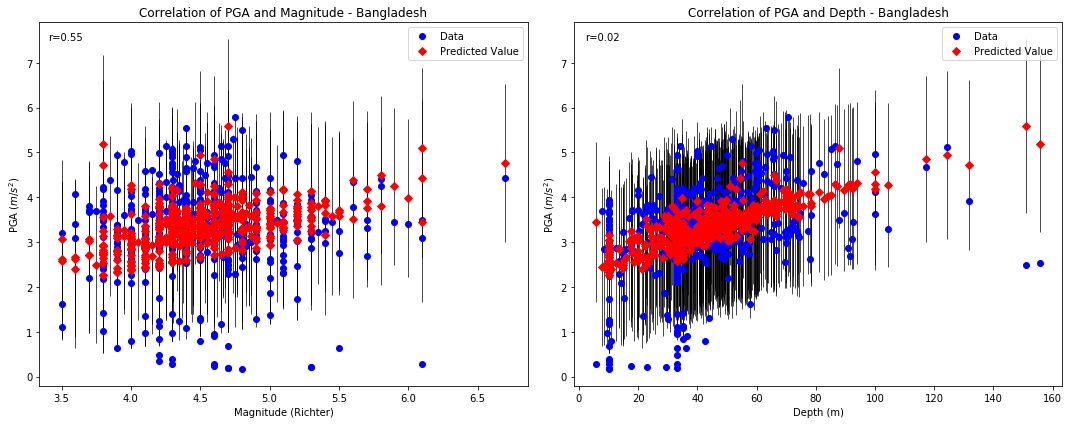

In [31]:
## Plot fitted values
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sm.graphics.plot_fit(result_bd, 0, ax=ax1)
ax1.annotate('r=0.55',xy=(3.4, 7.5))
ax1.legend(['Data', 'Predicted Value'])
ax1.set_ylabel('PGA ($m/s^2$)')
ax1.set_xlabel('Magnitude (Richter)')
ax1.set_title("Correlation of PGA and Magnitude - Bangladesh")

sm.graphics.plot_fit(result_bd, 1, ax=ax2)
ax2.annotate('r=0.02',xy=(2, 7.5))
ax2.legend(['Data', 'Predicted Value'])
ax2.set_ylabel('PGA ($m/s^2$)')
ax2.set_xlabel('Depth (m)')
ax2.set_title("Correlation of PGA and Depth - Bangladesh")
plt.tight_layout()
plt.savefig('../Figure/gshap_anss_ols.pdf')

## Part V - Historical Hurricane Tracks 1848 - 2017

#### In this part, I use `Basemap` to visualize storm track location and intensity data for Bangladesh.

From the website of IBTrACS 
> IBTrACS is a collection of best track data from numerous agencies. The data have been objectively combined to facilitate analysis. It does not represent any reanalysis of satellite or surface data.

> The IBTrACS project:
    > * Contains the most complete global set of historical tropical cyclones available
    > * Combines information from numerous tropical cyclone datasets
    > * Simplifies inter-agency comparisons by providing storm data from multiple sources in one place
    > * Provides data in popular formats to facilitate analysis
    > * Checks the quality of storm inventories, positions, pressures, and wind speeds, passing the information on to the user

Data Source:
- NOAA International Best Track Archive for Climate Stewardship (IBTrACS) data downloaded at: 
- https://www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data


### Load IBTrACS Data

In [32]:
ibtracs = pd.read_csv("../Data/Allstorms.ibtracs_wmo.v03r10.csv", sep=',',
                      parse_dates = ['ISO_time'], index_col = ['Serial_Num'],
                      header = 0, skiprows = [0,2], low_memory = False)
ibtracs.info()
ibtracs.head()

<class 'pandas.core.frame.DataFrame'>
Index: 200552 entries, 1848011S09080 to 2017161N13119
Data columns (total 15 columns):
Season                  200552 non-null int64
Num                     200552 non-null int64
Basin                   200552 non-null object
Sub_basin               200552 non-null object
Name                    200552 non-null object
ISO_time                200552 non-null datetime64[ns]
Nature                  200552 non-null object
Latitude                200552 non-null float64
Longitude               200552 non-null float64
Wind(WMO)               200552 non-null float64
Pres(WMO)               200552 non-null float64
Center                  200552 non-null object
Wind(WMO) Percentile    200552 non-null float64
Pres(WMO) Percentile    200552 non-null float64
Track_type              200552 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), object(6)
memory usage: 24.5+ MB


,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO),Center,Wind(WMO) Percentile,Pres(WMO) Percentile,Track_type
Serial_Num,,,,,,,,,,,,,,,
1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-11 06:00:00,NR,-8.6,79.8,0.0,0.0,reunion,-100.0,-100.0,main
1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-12 06:00:00,NR,-9.0,78.9,0.0,0.0,reunion,-100.0,-100.0,main
1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-13 06:00:00,NR,-10.4,73.2,0.0,0.0,reunion,-100.0,-100.0,main
1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-14 06:00:00,NR,-12.8,69.9,0.0,0.0,reunion,-100.0,-100.0,main
1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-15 06:00:00,NR,-13.9,68.9,0.0,0.0,reunion,-100.0,-100.0,main


### 10 Largest Storms by Wind Speed

In [33]:
## Create subset for Bangladesh
ibtracs_bd = subset_bd(ibtracs)

## Largest storms
ibtracs_bd.groupby(ibtracs_bd.index).mean().sort_values('Wind(WMO)', ascending = False).head(10)

,Season,Num,Latitude,Longitude,Wind(WMO),Pres(WMO),Wind(WMO) Percentile,Pres(WMO) Percentile
Serial_Num,,,,,,,,
1991113N10091,1991,2,21.550000,91.175000,102.750000,938.500000,79.514250,89.326250
1997133N03092,1997,1,20.860000,91.320000,90.000000,964.800000,92.226000,95.151600
2004136N15090,2004,2,20.250000,91.750000,83.500000,957.000000,90.706500,96.708500
2010293N17093,2010,6,20.333333,93.833333,68.333333,976.000000,83.510000,90.493000
1994117N07096,1994,2,21.050000,92.250000,57.500000,470.000000,-0.954000,-0.588500
2007314N10093,2007,6,22.357143,90.214286,49.285714,404.571429,-15.103429,-14.862571
1995323N05097,1995,7,20.833333,92.000000,47.333333,650.000000,23.898667,28.408000
1992314N08141,1992,38,20.375000,92.875000,46.250000,995.000000,47.146500,36.046250
2007133N15091,2007,1,20.500000,92.000000,45.000000,988.000000,59.505000,79.433000


### Bangladesh - Temporal Variation in Storm Occurrence

In [34]:
## Reformat IBTrACS data into time series
ibtracs_bd_ts = ibtracs_bd.set_index('ISO_time')
ibtracs_bd_ts.head()

,Season,Num,Basin,Sub_basin,Name,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO),Center,Wind(WMO) Percentile,Pres(WMO) Percentile,Track_type
ISO_time,,,,,,,,,,,,,,
1990-06-13 06:00:00,1990,3,NI,BB,NOT NAMED,NR,21.0,89.0,16.0,992.0,newdelhi,0.459,66.555,main
1990-06-13 12:00:00,1990,3,NI,BB,NOT NAMED,NR,21.0,89.0,27.0,991.0,newdelhi,19.505,72.177,main
1990-06-13 18:00:00,1990,3,NI,BB,NOT NAMED,NR,21.5,88.5,27.0,994.0,newdelhi,19.505,58.073,main
1990-06-14 00:00:00,1990,3,NI,BB,NOT NAMED,NR,21.5,88.0,27.0,992.0,newdelhi,19.505,66.555,main
1990-06-14 06:00:00,1990,3,NI,BB,NOT NAMED,NR,22.0,87.0,27.0,991.0,newdelhi,19.505,72.177,main


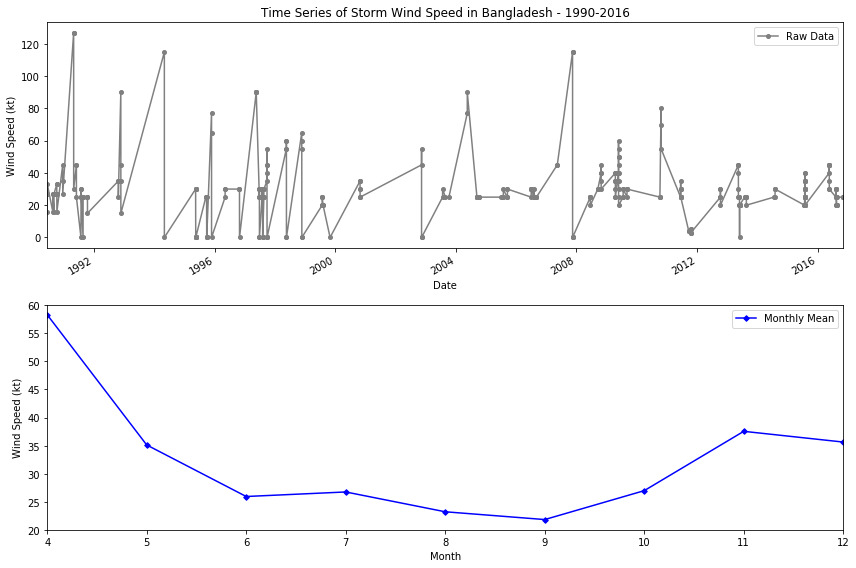

In [35]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize =(12,8))

## Raw time series 
ibtracs_bd_ts['Wind(WMO)'].plot(marker = 'o', markersize = 4, color ='gray', ax = ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Wind Speed (kt)')
ax1.set_title('Time Series of Storm Wind Speed in Bangladesh - 1990-2016')
ax1.legend(['Raw Data'])
## Monthly mean
ibtracs_bd_ts.groupby(ibtracs_bd_ts.index.month).mean()['Wind(WMO)'].plot(color = 'blue', 
                                                                          marker = 'D', 
                                                                          markersize = 4,
                                                                          ax = ax2)
ax2.set_xlabel('Month')
ax2.set_ylabel('Wind Speed (kt)')
ax2.legend(['Monthly Mean'])
plt.tight_layout()
plt.savefig('../Figure/ibtracs_ts_bd.pdf')

### Bangladesh - Spatial Variation in Storm Occurrence

In [36]:
## Group by latitude and longitude
# Full dataset 
st_avg = ibtracs.groupby(['Latitude', 'Longitude'], as_index = False).agg({'Season': 'first', 
                                                                           'Num': 'sum',
                                                                           'Basin': 'first',
                                                                           'Sub_basin': 'first',
                                                                           'Wind(WMO)': 'mean',
                                                                           'Pres(WMO)': 'mean',
                                                                           'ISO_time': 'count'})
st_avg = st_avg.rename(columns = {'ISO_time': 'Freq'})

# Bangladesh only 
st_avg_bd = ibtracs_bd.groupby(['Latitude', 'Longitude'], as_index = False).agg({'Season': 'first', 
                                                                                 'Num': 'sum',
                                                                                 'Basin': 'first',
                                                                                 'Sub_basin': 'first',
                                                                                 'Wind(WMO)': 'mean',
                                                                                 'Pres(WMO)': 'mean',
                                                                                 'ISO_time': 'count'})
st_avg_bd = st_avg_bd.rename(columns = {'ISO_time': 'Freq'})

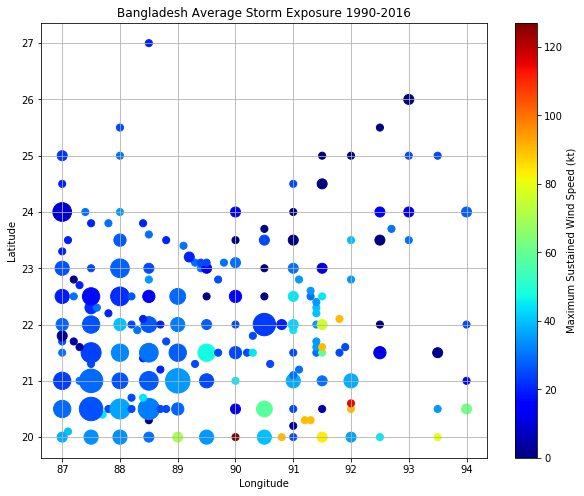

In [37]:
# Average Storm Wind Speed - Bangladesh
fig, ax = plt.subplots(figsize =(10,8))
x = ax.scatter(st_avg_bd.Longitude, st_avg_bd.Latitude, s = st_avg_bd.Freq*50, 
           marker = 'o', c = st_avg_bd['Wind(WMO)'], cmap = 'jet')
ax.grid()
ax.set_title('Bangladesh Average Storm Exposure 1990-2016')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
cb = fig.colorbar(x)
cb.set_label('Maximum Sustained Wind Speed (kt)')
plt.savefig('../Figure/ibtracs_avgWind_bd.pdf')

### Visualize Global Storm Exposure with `Basemap`

/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


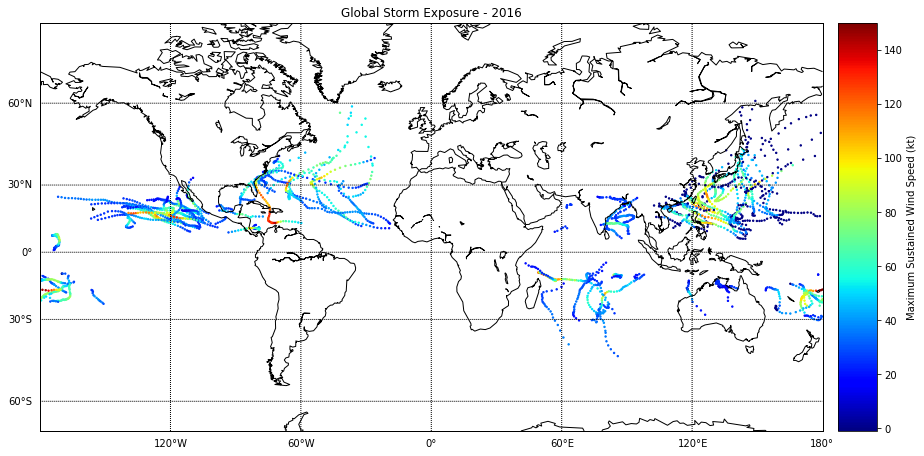

In [38]:
fig = plt.figure(figsize=(15, 10))
lon_all = np.array(ibtracs['Longitude'])
lat_all = np.array(ibtracs['Latitude'])
data_all = np.array(ibtracs['Wind(WMO)'])

lon_plt = np.array(ibtracs[ibtracs.Season == 2016]['Longitude'])
lat_plt = np.array(ibtracs[ibtracs.Season == 2016]['Latitude'])
data_plt = np.array(ibtracs[ibtracs.Season == 2016]['Wind(WMO)'])

m = Basemap(projection='mill',lat_ts=10,
            llcrnrlon=lon_all.min(), urcrnrlon=lon_all.max(),
            llcrnrlat=lat_all.min(), urcrnrlat=lat_all.max(),
            resolution='c')

x, y = m(lon_plt, lat_plt)
m.scatter(x, y, c = data_plt, cmap = 'jet', s = 2)

m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
cb = m.colorbar(location = 'right')
cb.set_label('Maximum Sustained Wind Speed (kt)')
plt.title('Global Storm Exposure - 2016')
plt.savefig('../Figure/ibtracs_wind_2016_global.pdf')